# Data and Statistics Packages

### Florian Oswald

**This is lecture is a slightly modified version of https://lectures.quantecon.org/jl/data_statistical_packages.html**
**Thank you to the amazing Quantecon.org team!**

## Contents

- [Data and Statistics Packages](#Data-and-Statistics-Packages)  
  - [Overview](#Overview)  
  - [DataFrames](#DataFrames)  
  - [Statistics and Econometrics](#Statistics-and-Econometrics)  

## Overview

This lecture explores some of the key packages for working with data and doing statistics in Julia

In particular, we will examine the `DataFrame` object in detail (i.e., construction, manipulation, querying, visualization, and nuances like missing data)

While Julia is not an ideal language for pure cookie-cutter statistical analysis, it has many useful packages to provide those tools as part of a more general solution

Examples include `GLM.jl` and `FixedEffectModels.jl`, which we discuss

This list is not exhaustive, and others can be found in organizations such as [JuliaStats](https://github.com/JuliaStats), [JuliaData](https://github.com/JuliaData/), and  [QueryVerse](https://github.com/queryverse)

In [1]:
using InstantiateFromURL

# activate the QuantEcon environment
activate_github("QuantEcon/QuantEconLectureAllPackages", tag = "v0.9.5");

######################################################################### 100.0%########################### 100.0%


Instantiating /Users/florian.oswald/Dropbox/teaching/ScPo/ScPo-CompEcon/CoursePack/Notebooks/.projects/QuantEconLectureAllPackages-v0.9.5
  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Precompiling project...
Precompiling Revise


┌ Info: Recompiling stale cache file /Users/florian.oswald/.julia/compiled/v1.1/Revise/M1Qoh.ji for Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1184


In [2]:
using LinearAlgebra, Statistics, Compat
using DataFrames, RDatasets, DataFramesMeta, CategoricalArrays, Query, VegaLite
using DataVoyager, GLM, RegressionTables, FixedEffectModels

┌ Info: Recompiling stale cache file /Users/florian.oswald/.julia/compiled/v1.1/RDatasets/JyIbx.ji for RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/florian.oswald/.julia/compiled/v1.1/DataFramesMeta/2xRTO.ji for DataFramesMeta [1313f7d8-7da2-5740-9ea0-a2ca25f37964]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/florian.oswald/.julia/compiled/v1.1/Query/wGX7b.ji for Query [1a8c2f83-1ff3-5112-b086-8aa67b057ba1]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/florian.oswald/.julia/compiled/v1.1/DataVoyager/5nnU1.ji for DataVoyager [5721bf48-af8e-5845-8445-c9e18126e773]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/florian.oswald/.julia/compiled/v1.1/GLM/6OREG.ji for GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/florian.oswald/.julia/compiled/v1.1/RegressionTables/cYvie.ji for RegressionT

## DataFrames

A useful package for working with data is [DataFrames.jl](https://github.com/JuliaStats/DataFrames.jl)

The most important data type provided is a `DataFrame`, a two dimensional array for storing heterogeneous data

Although data can be heterogeneous within a `DataFrame`, the contents of the columns must be homogeneous
(of the same type)

This is analogous to a `data.frame` in R, a `DataFrame` in Pandas (Python) or, more loosely, a spreadsheet in Excel

There are a few different ways to create a DataFrame

### Constructing a DataFrame

The first is to set up columns and construct a dataframe by assigning names

In [3]:
using DataFrames, RDatasets  # RDatasets provides good standard data examples from R

# note use of missing
commodities = ["crude", "gas", "gold", "silver"]
last_price = [4.2, 11.3, 12.1, missing]
df = DataFrame(commod = commodities, price = last_price)

,commod,price
,String,Float64⍰
1,crude,4.2
2,gas,11.3
3,gold,12.1
4,silver,missing


Columns of the `DataFrame` can be accessed by name using a symbol `df[:row]` or a struct-style `df.row`, as below

In [4]:
df[:price]

4-element Array{Union{Missing, Float64},1}:
  4.2     
 11.3     
 12.1     
   missing

In [5]:
df.price

4-element Array{Union{Missing, Float64},1}:
  4.2     
 11.3     
 12.1     
   missing

Note that the type of this array has values `Union{Missing, Float64}` since it was created with a `missing` value

In [6]:
df.commod

4-element Array{String,1}:
 "crude" 
 "gas"   
 "gold"  
 "silver"

The `DataFrames.jl` package provides a number of methods for acting on `DataFrame`’s, such as `describe`

In [7]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,DataType
1,commod,,crude,,silver,4,,String
2,price,9.2,4.2,11.3,12.1,,1,Float64


While often data will be generated all at once, or read from a file, you can **add to** a `DataFrame` by providing the key parameters

In [8]:
nt = (commod = "nickel", price= 5.1)
push!(df, nt)

,commod,price
,String,Float64⍰
1,crude,4.2
2,gas,11.3
3,gold,12.1
4,silver,missing
5,nickel,5.1


Named tuples can also be used to construct a `DataFrame`, and have it properly deduce all types

In [9]:
nt = (t = 1, col1 = 3.0)
df2 = DataFrame([nt])
push!(df2, (t=2, col1 = 4.0))

,t,col1
,Int64,Float64
1,1,3.0
2,2,4.0


### Working with Missing

As we discussed in [fundamental types](https://lectures.quantecon.org/jl/fundamental_types.html#missing), the semantics of `missing` are that mathematical operations will not silently ignore it

In order to allow `missing` in a column, you can create/load the `DataFrame`
from a source with `missing`’s, or call `allowmissing!` on a column

In [10]:
allowmissing!(df2, :col1) # necessary to add in a for col1
push!(df2, (t=3, col1 = missing))
push!(df2, (t=4, col1 = 5.1))

,t,col1
,Int64,Float64⍰
1,1,3.0
2,2,4.0
3,3,missing
4,4,5.1


We can see the propagation of `missing` to caller functions, as well as a way to efficiently calculate with non-missing data

In [11]:
@show mean(df2.col1)
@show mean(skipmissing(df2.col1))

mean(df2.col1) = missing
mean(skipmissing(df2.col1)) = 4.033333333333333


4.033333333333333

And to replace the `missing`

In [12]:
df2.col1  .= coalesce.(df2.col1, 0.0) # replace all missing with 0.0

4-element Array{Union{Missing, Float64},1}:
 3.0
 4.0
 0.0
 5.1

### Manipulating and Transforming DataFrames

One way to do an additional calculation with a `DataFrame` is to tuse the `@transform` macro from `DataFramesMeta.jl`

In [13]:
using DataFramesMeta
f(x) = x^2
df2 = @transform(df2, col2 = f.(:col1))

,t,col1,col2
,Int64,Float64⍰,Float64
1,1,3.0,9.0
2,2,4.0,16.0
3,3,0.0,0.0
4,4,5.1,26.01


### Categorical Data

For data that is [categorical](https://juliadata.github.io/DataFrames.jl/stable/man/categorical.html#Categorical-Data-1)

In [14]:
using CategoricalArrays
id = [1, 2, 3, 4]
y = ["old", "young", "young", "old"]
y = CategoricalArray(y)
df = DataFrame(id=id, y=y)

,id,y
,Int64,Categorical…
1,1,old
2,2,young
3,3,young
4,4,old


In [15]:
levels(df.y)

2-element Array{String,1}:
 "old"  
 "young"

### Visualization, Querying, and Plots

The `DataFrame` (and similar types that fulfill a standard generic interface) can fit into a variety of packages

One set of them is the [QueryVerse](https://github.com/queryverse)

**Note:** The QueryVerse, in the same spirit as R’s tidyverse, makes heavy use of the pipeline syntax `|>`

In [16]:
x = 3.0
f(x) = x^2
g(x) = log(x)

@show g(f(x))
@show x |> f |> g; # pipes nest function calls

g(f(x)) = 2.1972245773362196
(x |> f) |> g = 2.1972245773362196


To give an example directly from the source of the LINQ inspired [Query.jl](http://www.queryverse.org/Query.jl/stable/)

In [17]:
using Query

df = DataFrame(name=["John", "Sally", "Kirk"], age=[23., 42., 59.], children=[3,5,2])

x = @from i in df begin
    @where i.age>50
    @select {i.name, i.children}
    @collect DataFrame
end

,name,children
,String,Int64
1,Kirk,2


While it is possible to just use the `Plots.jl` library, there may be better options for displaying tabular data – such as [VegaLite.jl](http://fredo-dedup.github.io/VegaLite.jl/latest/)

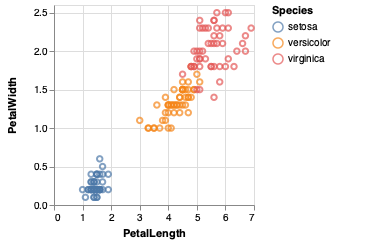

In [18]:
using RDatasets, VegaLite
iris = dataset("datasets", "iris")

iris |> @vlplot(
    :point,
    x=:PetalLength,
    y=:PetalWidth,
    color=:Species
)

Another useful tool for exploring tabular data is [DataVoyager.jl](https://github.com/queryverse/DataVoyager.jl)

```julia
using DataVoyager
iris |> Voyager()
```


## Statistics and Econometrics

While Julia is not intended as a replacement for R, Stata, and similar specialty languages, it has a growing number of packages aimed at statistics and econometrics

Many of the packages live in the [JuliaStats organization](https://github.com/JuliaStats/)

A few to point out

- [StatsBase](https://github.com/JuliaStats/StatsBase.jl) has basic statistical functions such as geometric and harmonic means, auto-correlations, robust statistics, etc.  
- [StatsFuns](https://github.com/JuliaStats/StatsFuns.jl) has a variety of mathematical functions and constants such as pdf and cdf of many distributions, softmax, etc.  

### General Linear Models

To run linear regressions and similar statistics, use the [GLM](http://juliastats.github.io/GLM.jl/latest/) package

In [19]:
using GLM

x = randn(100)
y = 0.9 .* x + 0.5 * rand(100)
df = DataFrame(x=x, y=y)
ols = lm(@formula(y ~ x), df) # R-style notation

┌ Warning: In the future eachcol will have names argument set to false by default
│   caller = evalcontrasts(::DataFrame, ::Dict{Any,Any}) at modelframe.jl:124
└ @ StatsModels /Users/florian.oswald/.julia/packages/StatsModels/AYB2E/src/modelframe.jl:124


StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: y ~ 1 + x

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)  0.226951 0.0129786 17.4865   <1e-31
x            0.903225 0.0127802  70.674   <1e-85


To display the results in a useful tables for LaTeX and the REPL, use
[RegressionTables](https://github.com/jmboehm/RegressionTables.jl/) developed at SciencesPo by [Johannes Böhm](https://jmboehm.github.io) for output
similar to the Stata package esttab and the R package stargazer

In [20]:
using RegressionTables
regtable(ols)
# regtable(ols,  renderSettings = latexOutput()) # for LaTex output


----------------------
                  y   
              --------
                   (1)
----------------------
(Intercept)   0.227***
               (0.013)
x             0.903***
               (0.013)
----------------------
Estimator          OLS
----------------------
N                  100
R2               0.981
----------------------




### Fixed Effects

While Julia may be overkill for estimating a simple linear regression,
fixed-effects estimation with dummies for multiple variables are much more computationally intensive

For a 2-way fixed-effect, taking the example directly from the documentation using [cigarette consumption data](https://github.com/johnmyleswhite/RDatasets.jl/blob/master/doc/plm/rst/Cigar.rst)

In [21]:
using FixedEffectModels
cigar = dataset("plm", "Cigar")
cigar.StateCategorical =  categorical(cigar.State)
cigar.YearCategorical =  categorical(cigar.Year)
fixedeffectresults = reg(cigar, @model(Sales ~ NDI, fe = StateCategorical + YearCategorical,
                            weights = Pop, vcov = cluster(StateCategorical)))
regtable(fixedeffectresults)


----------------------------
                     Sales  
                   ---------
                         (1)
----------------------------
NDI                -0.005***
                     (0.001)
----------------------------
StateCategorical         Yes
YearCategorical          Yes
----------------------------
Estimator                OLS
----------------------------
N                      1,380
R2                     0.804
----------------------------




To explore the data use the interactive DataVoyager and VegaLite

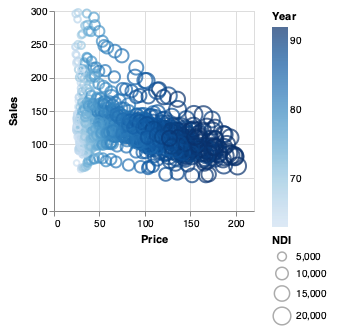

In [22]:
# cigar |> Voyager()

cigar |> @vlplot(
    :point,
    x=:Price,
    y=:Sales,
    color=:Year,
    size=:NDI
)